## Final Project Submission

Please fill out:
* Student name: **PHINIDY GEORGE**
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: ASHA DEEN
* Blog post URL:


**1.BUSINESS UNDERSTANDING**

**a) Introduction**

Microsoft,a tech giant known for its software and hardware products,is venturing into the movie industry by establing a new movie studio.This strategic move aims to diversify microsoft business portfolio and capitalize on the growing demand for original video content.

**b) Problem statement**

Microsoft faces the challenge of navigating the complex and competitive landscape of the movie industry without prior knowledge or experience.The lack of understanding about successful movie genre,audience preference and industry trends makes it challenging for Microsoft to make informed decision about content creation.Without proper insights,Microsoft risk investing resources in projects that may not resonate with audience or generate significant returns.

**c) Objective**

The primary objective of this analysis is to provide Microsoft new movie studio with actionable insights into successfull movie genre and market trends.By exploring data from various sources,including box office performance ,audience ratings and genre performance,we aim to identify patterns and trends that can inform content creation strategies.Ultimately, our goal is to equip Microsoft with the knowledge and understanding needed to produce engaging and commercially successful movies that resonate with audiences and contribute to the studio's long-term success in the movie industry.

In [ ]:
#importing libraries

# Importing libraries for data manipulation
import pandas as pd
import numpy as np

# Importing libraries for database access
import sqlite3

# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Magic command to display plots inline
%matplotlib inline

**2) DATA UNDERSTANDING**

To understand successful movie genres, we will analyze datasets from various sources, including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers. These datasets contain information about movie titles, genres, box office revenues, ratings, and more. By examining these datasets, we can gain insights into which movie genres are popular among audiences and performing well financially.

**a)Financial performance of the studios**(df_studio)

By analyzing this dataframe, we can gain insights into the competitive landscape within the movie industry and identify key players that Microsoft may encounter as competitors in the market

In [2]:
df_studio=pd.read_csv(r"zippedData\bom.movie_gross.csv")
df_studio

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


**b) Movie Attributes**(df_tmdm_movies)

The df_tmdm_movies table contains details about each movie, including genre, original language, release date, popularity, and vote average. Microsoft can analyze this data to understand which genres are popular among audiences and which movies receive higher ratings, helping them decide what types of films to produce

In [ ]:
df_tmdm_movies=pd.read_csv(r"zippedData\tmdb.movies.csv")
df_tmdm_movies

   **C)Revenue Analysis**(df_movie_budgets)

The df_movie_budgets table provides information about the production budget, domestic gross, and worldwide gross for various movies. By analyzing this data, Microsoft can identify trends in box office performance, such as which genres or types of movies tend to have higher gross earnings

In [ ]:
df_movie_budgets=pd.read_csv(r"zippedData\tn.movie_budgets.csv")
df_movie_budgets

**d) Critical Reception**(df_reviews)

The df_reviews table includes reviews from critics, along with ratings and freshness indicators. Analyzing this data can provide insights into the critical reception of different movies, helping Microsoft understand the quality of films that resonate well with audiences.

In [ ]:
df_reviews=pd.read_csv(r"zippedData\rt.reviews.tsv", sep='\t',  encoding='latin1')
df_reviews

**GENRES**(df_imbd)

In [ ]:
df_imbd = pd.read_csv(r"zippedData\rt.movie_info.tsv", sep='\t', encoding='latin1')
df_imbd

By combining insights from these tables, Microsoft can make informed decisions about the types of movies to produce for their new movie studio. They can prioritize genres with high box office performance, target audiences based on popular movie attributes, and aim to produce high-quality films that receive positive critical reception

**3) DATA PREPARATION**

Before analysis, we need to clean and preprocess the data. This involves handling missing values, removing duplicates, and formatting data for consistency. Additionally, we may need to merge datasets to create a comprehensive dataset for analysis. By ensuring data quality and integrity, we can perform accurate and meaningful analysis.

**a)df_studio**

In [7]:
df_studio=pd.read_csv(r"zippedData\bom.movie_gross.csv")

# Check for missing values
missing_values =df_studio .isna().sum()
print("Missing values:\n", missing_values)


# Check for duplicates
duplicate_rows = df_studio[df_studio.duplicated()]
print("\nNumber of duplicate rows:", duplicate_rows.shape[0])


Missing values:
 title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Number of duplicate rows: 0


In [8]:
# Convert 'foreign_gross' column to numeric, coerce errors to NaN
df_studio['foreign_gross'] = pd.to_numeric(df_studio['foreign_gross'], errors='coerce')

# Replace missing values in 'foreign_gross' with mean
df_studio['foreign_gross'].fillna(df_studio['foreign_gross'].mean(), inplace=True)

# Replace missing values in 'domestic_gross' with mean
df_studio['domestic_gross'].fillna(df_studio['domestic_gross'].mean(), inplace=True)

# Replace missing values in 'studio' with placeholder 'Unknown'
df_studio['studio'].fillna('Unknown', inplace=True)

# Verify that missing values are filled
missing_values_after = df_studio.isna().sum()
print("Missing values after filling:\n", missing_values_after)

Missing values after filling:
 title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [9]:

import pandas as pd
import numpy as np

# Read the CSV file
df_studio = pd.read_csv(r"zippedData\bom.movie_gross.csv")

# Convert 'foreign_gross' column to numeric
df_studio['foreign_gross'] = pd.to_numeric(df_studio['foreign_gross'], errors='coerce')

# Fill missing values in 'foreign_gross' with mean
mean_foreign_gross = df_studio['foreign_gross'].mean()
df_studio['foreign_gross'].fillna(mean_foreign_gross, inplace=True)

# Calculate Z-score for 'domestic_gross' and 'foreign_gross'
z_scores_domestic = (df_studio['domestic_gross'] - df_studio['domestic_gross'].mean()) / df_studio['domestic_gross'].std()
z_scores_foreign = (df_studio['foreign_gross'] - df_studio['foreign_gross'].mean()) / df_studio['foreign_gross'].std()

# Identify outliers based on Z-score
outliers_domestic = df_studio[(z_scores_domestic > 3) | (z_scores_domestic < -3)]
outliers_foreign = df_studio[(z_scores_foreign > 3) | (z_scores_foreign < -3)]

# Display outliers
print("Outliers in 'domestic_gross':\n", outliers_domestic)
print("\nOutliers in 'foreign_gross':\n", outliers_foreign)



Outliers in 'domestic_gross':
                                             title studio  domestic_gross  \
0                                     Toy Story 3     BV     415000000.0   
1                      Alice in Wonderland (2010)     BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                       Inception     WB     292600000.0   
4                             Shrek Forever After   P/DW     238700000.0   
...                                           ...    ...             ...   
3081               Jurassic World: Fallen Kingdom   Uni.     417700000.0   
3082                                Incredibles 2     BV     608600000.0   
3083                                      Aquaman     WB     335100000.0   
3087                                   Deadpool 2    Fox     318500000.0   
3096                 Dr. Seuss' The Grinch (2018)   Uni.     270600000.0   

      foreign_gross  year  
0       652000000.0  2010  


**b)df_tmdb_movies**

Check for missing values: Identify any missing values in the datasets and decide how to handle them (e.g., imputation, removal).

In [10]:
import pandas as pd

# Check for missing values
missing_values = df_tmdm_movies.isna().sum()
print(missing_values)



Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


**Duplicates:** Check for and remove any duplicate rows if present.

In [11]:


# Read the CSV file into a DataFrame
df_tmdb_movies = pd.read_csv(r"zippedData\tmdb.movies.csv")

# Check for duplicate rows
duplicate_rows = df_tmdb_movies[df_tmdb_movies.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 0


**c)df_movie_budgets**

In [12]:
df_movie_budgets=pd.read_csv(r"zippedData\tn.movie_budgets.csv")
#check for missing value
missing_values = df_movie_budgets.isnull().sum()
print("Missing values:\n", missing_values)
#check for duplicates
duplicate_rows = df_movie_budgets[df_movie_budgets.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])


Missing values:
 id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
Number of duplicate rows: 0


**d)df_reviews**

In [13]:
df_reviews=pd.read_csv(r"zippedData\rt.reviews.tsv", sep='\t',  encoding='latin1')
# Check for missing values
missing_values = df_reviews.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicates
duplicates = df_reviews.duplicated().sum()
print("\nDuplicate Rows:", duplicates)

Missing Values:
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

Duplicate Rows: 9


In [14]:
import pandas as pd

# Load the DataFrame
df_reviews = pd.read_csv(r"zippedData\rt.reviews.tsv", sep='\t', encoding='latin1')

# Check if 'publisher' column exists before dropping
if 'publisher' in df_reviews.columns:
    df_reviews.drop(columns=['publisher'], inplace=True)

# Fill missing rating with mean
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')
mean_rating = df_reviews['rating'].mean()
df_reviews['rating'].fillna(mean_rating, inplace=True)

# Replace missing critic values with a placeholder
df_reviews['critic'].fillna('Unknown Critic', inplace=True)

# Replace missing reviews with a placeholder
df_reviews['review'].fillna('No review available', inplace=True)

# Check the cleaned DataFrame
df_reviews


,id,review,rating,fresh,critic,top_critic,date
0,3,A distinctly gallows take on contemporary fina...,5.135733,fresh,PJ Nabarro,0,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,5.135733,rotten,Annalee Newitz,0,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,5.135733,fresh,Sean Axmaker,0,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,5.135733,fresh,Daniel Kasman,0,"November 16, 2017"
4,3,... a perverse twist on neorealism...,5.135733,fresh,Unknown Critic,0,"October 12, 2017"
...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,5.135733,fresh,Laura Sinagra,1,"September 24, 2002"
54428,2000,No review available,5.135733,rotten,Michael Szymanski,0,"September 21, 2005"
54429,2000,No review available,5.135733,rotten,Emanuel Levy,0,"July 17, 2005"
54430,2000,No review available,5.135733,rotten,Christopher Null,0,"September 7, 2003"


**df_imbd**

In [15]:
import pandas as pd

# Read the data
df_imbd = pd.read_csv(r"zippedData\rt.movie_info.tsv", sep='\t', encoding='latin1')

# Check for missing values
missing_values = df_imbd.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = df_imbd.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)

Missing Values:
 id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Number of Duplicates: 0


In [16]:
import pandas as pd

# Read the data
df_imbd = pd.read_csv(r"zippedData\rt.movie_info.tsv", sep='\t', encoding='latin1')

# Impute missing values in 'currency' and 'studio' columns with the mode
df_imbd['currency'].fillna(df_imbd['currency'].mode()[0], inplace=True)
df_imbd['studio'].fillna(df_imbd['studio'].mode()[0], inplace=True)

# Clean 'box_office' column: remove commas and convert to numeric
df_imbd['box_office'] = df_imbd['box_office'].str.replace(',', '').astype(float)

# Impute missing values in 'box_office' column with the median
df_imbd['box_office'] = df_imbd['box_office'].fillna(df_imbd['box_office'].median())

# Verify the changes
print(df_imbd.isnull().sum())
df_imbd.head()

id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
dvd_date        359
currency          0
box_office        0
runtime          30
studio            0
dtype: int64


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",$,14141054.5,104 minutes,Universal Pictures
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",$,14141054.5,116 minutes,Universal Pictures
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",$,14141054.5,128 minutes,Universal Pictures
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,$,14141054.5,200 minutes,Universal Pictures



**3)DATA ANALYSIS AND MODELLING**

**Now that the data is nice and neat, we can model it to answer our questions.**

**Question 1: Who is my competition?**

Who is my competition?:

~Top 10 Studios producing the most films.

~Top 10 Studios making the highest gross income in average.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%store -r studios_df

no stored variable or alias studios_df


In [18]:
df_studio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


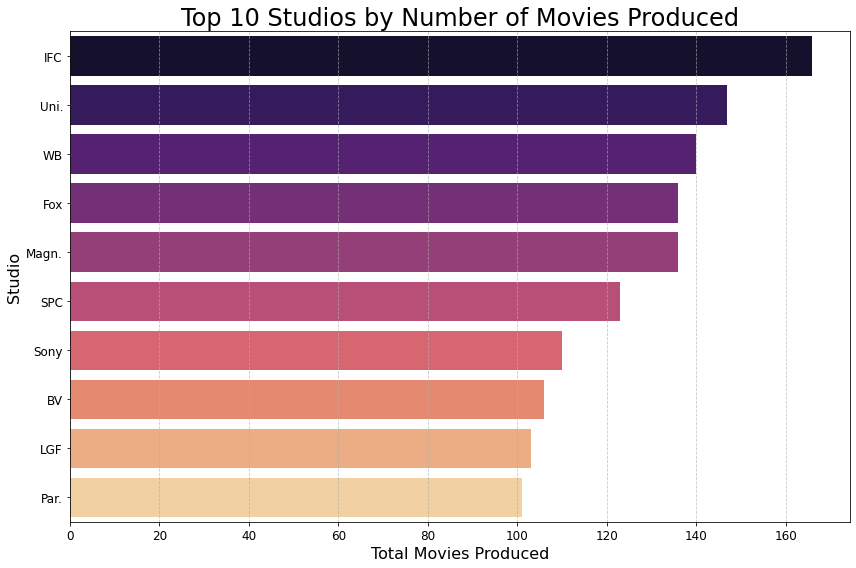

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the count of movies produced by each studio
studio_count = df_studio['studio'].value_counts()
studio_count = studio_count[:10]

# Plot the top 10 studios by number of movies produced with enhanced aesthetics
plt.figure(figsize=(12, 8))  # Adjust figure size for better visibility
sns.barplot(x=studio_count.values, y=studio_count.index, palette='magma')  # Use a color palette for better aesthetics
plt.title('Top 10 Studios by Number of Movies Produced', fontsize=24)
plt.xlabel('Total Movies Produced', fontsize=16)
plt.ylabel('Studio', fontsize=16)
plt.xticks(fontsize=12)  # Adjust font size for x-axis labels
plt.yticks(fontsize=12)  # Adjust font size for y-axis labels
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


All of these are American studio producers


**TOP 10 STUDIOS MAKING THE HIGHEST GROSS INCOME IN AVERAGE**

In [20]:
df_studio.info()
# Convert 'foreign_gross' column to numeric type, handling non-numeric values
df_studio['foreign_gross'] = pd.to_numeric(df_studio['foreign_gross'], errors='coerce')

# Check the data type after conversion
df_studio['foreign_gross'].dtype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


dtype('float64')

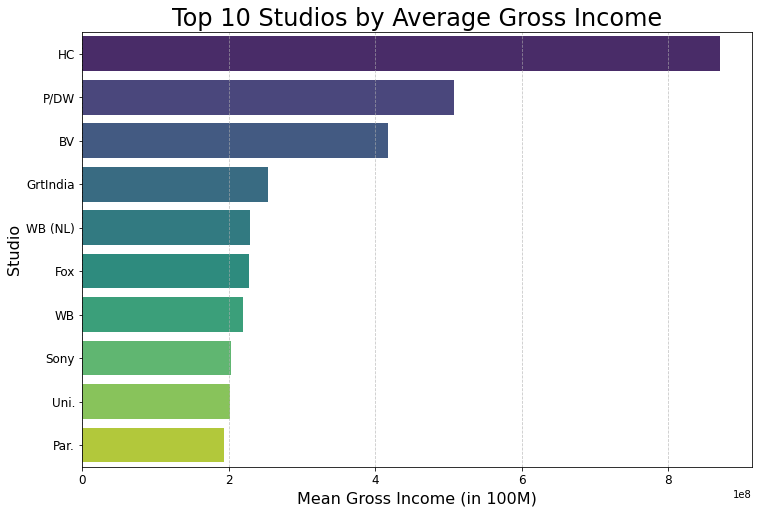

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df_studio = pd.read_csv(r"zippedData\bom.movie_gross.csv")

# Clean 'domestic_gross' column
df_studio['domestic_gross'] = df_studio['domestic_gross'].fillna('$0').astype(str).str.replace(r'[\$,]', '').astype(float)

# Clean 'foreign_gross' column
df_studio['foreign_gross'] = df_studio['foreign_gross'].fillna('$0').astype(str).str.replace(r'[\$,]', '').astype(float)

# Create a new column 'total_gross' as the sum of 'domestic_gross' and 'foreign_gross'
df_studio['total_gross'] = df_studio['domestic_gross'] + df_studio['foreign_gross']

# Group by studio and calculate the mean of total_gross
studios_grp = df_studio.groupby(['studio'])
mean_gross = studios_grp['total_gross'].mean()
mean_gross.sort_values(ascending=False, inplace=True)
mean_gross = mean_gross[:10]

# Plot the top 10 studios by mean gross income with enhanced aesthetics
plt.figure(figsize=(12, 8))  # Adjust figure size for better visibility
sns.barplot(x=mean_gross.values, y=mean_gross.index, palette='viridis')  # Use a color palette for better aesthetics
plt.title('Top 10 Studios by Average Gross Income', fontsize=24)
plt.xlabel('Mean Gross Income (in 100M)', fontsize=16)
plt.ylabel('Studio', fontsize=16)
plt.xticks(fontsize=12)  # Adjust font size for x-axis labels
plt.yticks(fontsize=12)  # Adjust font size for y-axis labels
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()


**Which movies drove this studios to the Head of the table?** lets find out.

In [22]:

import pandas as pd

# Read the CSV file
df_studio = pd.read_csv(r"zippedData\bom.movie_gross.csv")

# Filter the DataFrame to select rows where the 'studio' column matches the specified studios
filtered_df = df_studio.loc[df_studio['studio'].isin(['HC', 'P/DW', 'GrtIndia'])]

# Display the filtered DataFrame
filtered_df


,title,studio,domestic_gross,foreign_gross,year
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
17,Megamind,P/DW,148400000.0,173500000,2010
71,Dinner for Schmucks,P/DW,73000000.0,13800000,2010
329,Transformers: Dark of the Moon,P/DW,352400000.0,771400000,2011
333,Kung Fu Panda 2,P/DW,165200000.0,500400000,2011
338,Puss in Boots,P/DW,149300000.0,405700000,2011
734,Madagascar 3: Europe's Most Wanted,P/DW,216400000.0,530500000,2012
752,Rise of the Guardians,P/DW,103400000.0,203500000,2012
865,A Thousand Words,P/DW,18500000.0,3600000,2012


**HC (Huaxia Film Distribution Co., Ltd)**:

Despite having only one movie in the provided dataset, 'Wolf Warrior 2' made a significant impact on their overall performance

**GrtIndia (Great India Films)**:

Released 'Baahubali 2: The Conclusion' in 2017, which performed exceptionally well, especially in the foreign market.
Although they also have only one movie listed in the dataset, 'Baahubali 2: The Conclusion' made a substantial contribution to their total gross income.

**INFERENCES**

~The success of these studios can be attributed to their ability to produce high-quality films across different genres, effectively market them to a global audience, and capitalize on blockbuster hits that resonate with viewers worldwide.

~The quantity of films produced doesn't necessarily correlate with increased revenue.

~The dominance of the movie industry is predominantly centered in the USA.

**RECOMMANDATION**

.Focus on Quality Over Quantity: Rather than solely focusing on the quantity of films produced, studios should prioritize producing high-quality films across different genres.

.Global Market Expansion:Microsoft should develop targeted strategies to penetrate emerging markets, such as China, India, and Latin America, where there is a growing appetite for diverse cinematic content.

.Adaptability and Innovation: In an ever-evolving entertainment landscape, Microsoft must remain agile, adaptable, and innovative to stay ahead of market trends and audience preference.

.Strategic Marketing and Distribution: Studios should invest in targeted marketing campaigns that leverage digital channels, social media platforms, and data analytics to identify and engage with specific audience segments.

**Question 2: What do people like**
    
    .Top 10 most produced Genres
    
    

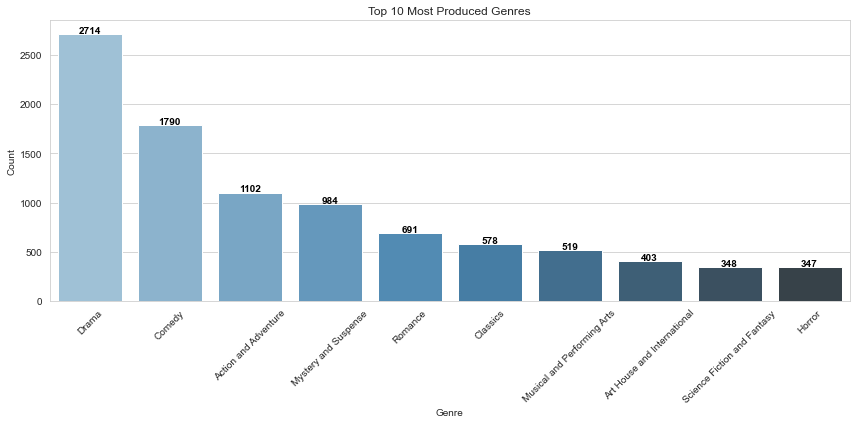

In [23]:
# Merge df_movie_budgets with df_imbd_dropped on the 'id' column
merged_df = df_movie_budgets.merge(df_imbd, on='id', how='left')
merged_df
# Now merged_df contains the combined information from both dataframes based on movie id

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame containing the data
genre_counts = merged_df['genre'].str.split('|').explode().value_counts().head(10)

# Setting seaborn style
sns.set_style("whitegrid")

# Plotting the top 10 most produced genres
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Blues_d")
plt.title('Top 10 Most Produced Genres')
plt.xlabel('Genre')
plt.ylabel('Count')

# Adding annotations
for index, value in enumerate(genre_counts):
    bar_plot.text(index, value + 10, str(value), ha='center', color='black', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**INFERENCE**

 Drama, Comedy, and Action & Adventure dominate the production landscape, while other genres contribute to the rich diversity of cinematic experiences.

**RECOMMENDATION**

By embracing genre diversity and implementing targeted strategies to engage with diverse audience segments, Microsoft can enhance competitiveness, foster audience loyalty, and drive growth in the evolving landscape of the movie industry.

**Question 3: What does number represent**

    .How does the profitability (ROI) of movies vary across different production budget ranges?
    .How has the total revenue of the movie industry changed over the years?
    .Do budget allocations correlate with revenue generation?
    .Is there's a correlation between movie ratings and revenue.
    .Are there any seasonal trends in movie revenue (e.g., higher revenue during the summer or holiday seasons)?
    

 **ROI  and budget analysis**

In [24]:
df_movie_budgets=pd.read_csv(r"zippedData\tn.movie_budgets.csv")
df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [25]:
 #Convert budget and gross columns to numeric values
df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate ROI
df_movie_budgets['ROI'] = ((df_movie_budgets['worldwide_gross'] - df_movie_budgets['production_budget']) / df_movie_budgets['production_budget']) * 100

# Analyze ROI based on different criteria
# For example, you can analyze ROI based on different budget ranges:
budget_bins = [0, 10000000, 50000000, 100000000, 500000000, float('inf')]
budget_labels = ['<10M', '10M-50M', '50M-100M', '100M-500M', '>500M']
df_movie_budgets['budget_range'] = pd.cut(df_movie_budgets['production_budget'], bins=budget_bins, labels=budget_labels)

# Calculate median ROI for each budget range
median_roi_by_budget_range = df_movie_budgets.groupby('budget_range')['ROI'].median()

print(median_roi_by_budget_range)

budget_range
<10M          14.250859
10M-50M       67.807611
50M-100M     102.138960
100M-500M    180.602767
>500M               NaN
Name: ROI, dtype: float64


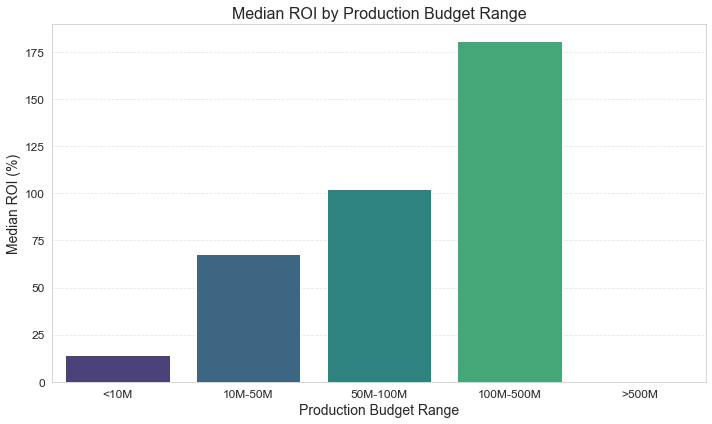

In [26]:


# Create a DataFrame with the ROI analysis findings
roi_data = {
    'budget_range': ['<10M', '10M-50M', '50M-100M', '100M-500M', '>500M'],
    'median_roi': [14.25, 67.81, 102.14, 180.60, None]  # Including None for the missing value
}
roi_df = pd.DataFrame(roi_data)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='budget_range', y='median_roi', data=roi_df, palette='viridis')
plt.title('Median ROI by Production Budget Range', fontsize=16)
plt.xlabel('Production Budget Range', fontsize=14)
plt.ylabel('Median ROI (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**INFERENCE**

Budget Range vs. Median ROI:

The x-axis represents different production budget ranges, categorized as "<10M", "10M-50M", "50M-100M", "100M-500M", and ">500M".
The y-axis represents the median ROI percentage (%), which indicates the profitability of movies relative to their budget.




**RECOMMENDATION**

While higher-budget films tend to have higher median ROI, there are diminishing returns as budgets increase. Therefore, careful consideration of budget allocation and risk assessment is essential for optimizing profitability.

**Revenue Trends Over Time**

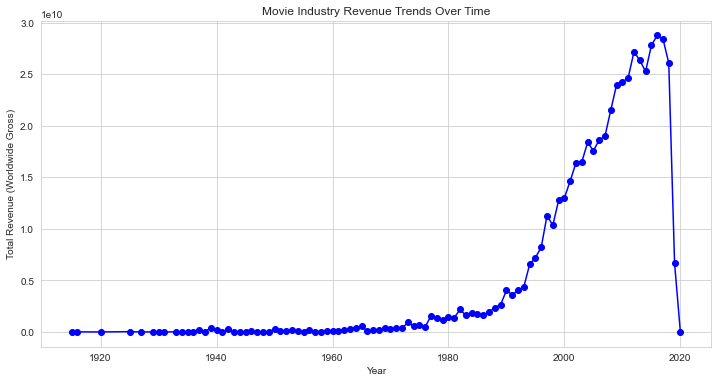

In [27]:

# Convert 'release_date' to datetime format
df_movie_budgets['release_date'] = pd.to_datetime(df_movie_budgets['release_date'])

# Extract year from 'release_date'
df_movie_budgets['year'] = df_movie_budgets['release_date'].dt.year

# Group by year and calculate total revenue for each year
revenue_by_year = df_movie_budgets.groupby('year')['worldwide_gross'].sum()

# Plot revenue trends over time
plt.figure(figsize=(12, 6))
revenue_by_year.plot(marker='o', color='b', linestyle='-')
plt.title('Movie Industry Revenue Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue (Worldwide Gross)')
plt.grid(True)
plt.show()


**INFERENCE**

The total revenue of the movie industry saw a significant drop in 2020 compared to previous years. The impact of the pandemic highlighted the industry's vulnerability to external factors and accelerated ongoing trends towards digital distribution and streaming services. Despite the challenges faced in 2020, the movie industry continues to adapt and evolve in response to changing consumer behavior and market dynamics.

**RECOMMENDATION**

Embrace digital transformation, foster strategic partnerships, and leverage data-driven insights, to navigate the challenges posed by the pandemic and capitalize on the opportunities presented by the shift towards digital distribution and streaming services to drive revenue growth and sustain long-term success in the digital era

**Do budget allocations correlate with revenue generation?**

In [28]:
# Merge df_movie_budgets with df_imbd on the 'id' column
# Merge df_movie_budgets with df_imbd_dropped on the 'id' column
merged_df = df_movie_budgets.merge(df_imbd, on='id', how='left')
merged_df.info()
# Now merged_df contains the combined information from both dataframes based on movie id

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   float64       
 6   ROI                5782 non-null   float64       
 7   budget_range       5782 non-null   category      
 8   year               5782 non-null   int64         
 9   synopsis           4508 non-null   object        
 10  rating             4624 non-null   object        
 11  genre              4624 non-null   object        
 12  director           3874 non-null   object        
 13  writer             3412 non-null   object        
 14  theater_

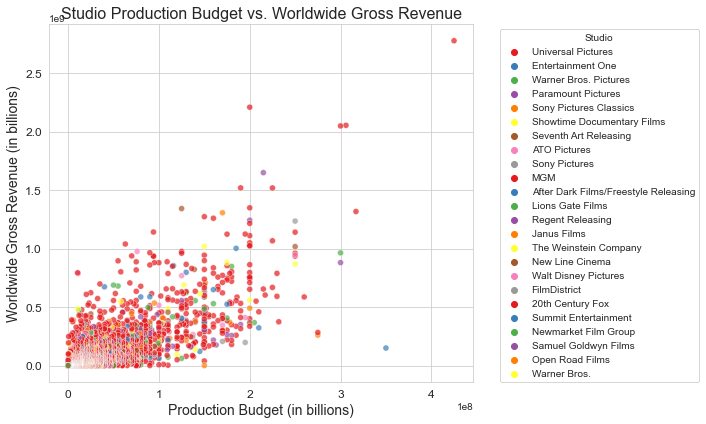

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where both budget and revenue are available
studio_budget_revenue = merged_df[['studio', 'production_budget', 'worldwide_gross']].dropna()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', hue='studio', data=studio_budget_revenue, palette='Set1', alpha=0.7)
plt.title('Studio Production Budget vs. Worldwide Gross Revenue', fontsize=16)
plt.xlabel('Production Budget (in billions)', fontsize=14)
plt.ylabel('Worldwide Gross Revenue (in billions)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Studio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


**INFERENCES**

The positive correlation suggests that studios that invest more in movie production tend to generate higher revenue. This indicates that there's a direct relationship between the resources allocated to a film project and its potential to generate returns

**RECOMMENDATION**

Based on these findings, we recommend that Microsoft consider allocating higher budgets to movie production, especially for projects with significant revenue potential. By investing more resources upfront, studios can enhance the quality of their films and increase their chances of success at the box office.

**Investigate whether there's a correlation between movie ratings and revenue.**

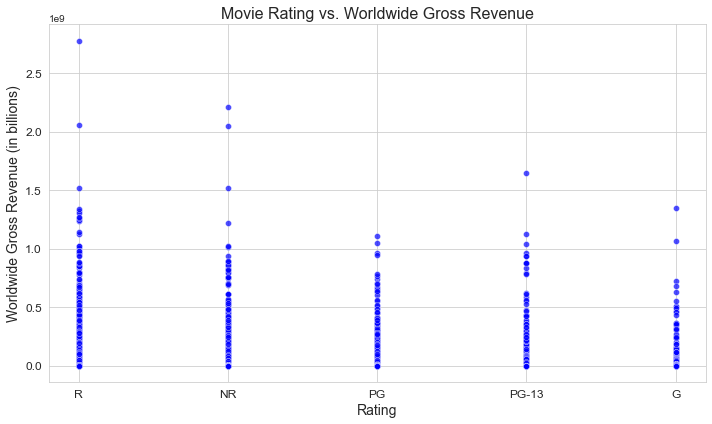

In [30]:
# Filter out rows where both rating and revenue are available
rating_revenue = merged_df[['rating', 'worldwide_gross']].dropna()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='worldwide_gross', data=rating_revenue, color='blue', alpha=0.7)
plt.title('Movie Rating vs. Worldwide Gross Revenue', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Worldwide Gross Revenue (in billions)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


**INFERENCE**

Movies with higher ratings tend to generate more substantial revenue, indicating that critical acclaim may contribute to commercial success in terms of box office earnings.

**RECOMMENDATION**

Focus on Quality and Audience Engagement: Given the positive correlation between high ratings and revenue, studios should prioritize producing high-quality content that resonates with audiences.

**Seasonal Trends**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
merged_df = df_movie_budgets.merge(df_imbd_dropped, on='id', how='left')
# Convert 'worldwide_gross' column to numeric
merged_df['worldwide_gross'] = pd.to_numeric(merged_df['worldwide_gross'], errors='coerce')

# Extract month and season from the 'release_date' column
merged_df['month'] = merged_df['release_date'].dt.month
merged_df['season'] = merged_df['release_date'].dt.month // 3 % 4

# Group by season and month, then calculate total revenue
seasonal_revenue = merged_df.groupby('season')['worldwide_gross'].sum()
monthly_revenue = merged_df.groupby('month')['worldwide_gross'].sum()

# Map season and month numbers to their respective names
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_revenue.index = [season_names[season] for season in seasonal_revenue.index]
monthly_revenue.index = [month_names[month-1] for month in monthly_revenue.index]

# Plot both seasonal and monthly revenue trends on the same graph with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot seasonal revenue trends
ax1.bar(seasonal_revenue.index, seasonal_revenue.values, color='skyblue', label='Seasonal Revenue')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Seasonal Revenue', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a secondary y-axis for monthly revenue
ax2 = ax1.twinx()
ax2.plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='red', label='Monthly Revenue')
ax2.set_ylabel('Monthly Revenue', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

# Add legend
fig.legend(loc="upper right", fontsize=12)

plt.title('Seasonal and Monthly Revenue Trends', fontsize=16)
plt.tight_layout()
plt.show()


NameError: name 'df_imbd_dropped' is not defined

**INFERENCE**

Movie revenue  exhibit strong seasonal patterns.

**RECOMMENDATION**
leverage insights from seasonal revenue trends to help Microsoft make informed decisions regarding content creation, release timing, marketing strategies, and audience engagement, ultimately maximizing revenue potential and optimizing business 


In [ ]:
# Perform inner join based on the 'id' column
critics_df = pd.merge(df_tmdm_movies, df_reviews, on='id', how='inner')

# Display the merged DataFrame
critics_df.head()
critics_df.info()

**CORRELATION ANALYSIS:**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numerical_columns = critics_df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables in critics_df')
plt.show()
